![](https://www.gstatic.com/devrel-devsite/va3a0eb1ff00a004a87e2f93101f27917d794beecfd23556fc6d8627bba2ff3cf/tensorflow/images/lockup.svg)

# RNN with Keras and Tensorflow Backend

Kevin Walchko

10 Aug 2019

---

Cat detector, trained using the tiny imagenet dataset. The images from n02120xx - n02129xx are all some kind of cat.

### References

- [ResNet with Tensorflow](https://github.com/taki0112/ResNet-Tensorflow)
- [c231 Image Data: tiny-imagenet](https://tiny-imagenet.herokuapp.com/)
---

In [1]:
%matplotlib inline

In [19]:
# math and plotting things loaded
import matplotlib.pyplot as plt
import numpy as np

In [28]:
import simplejson as json

In [18]:
# get some file/directory stuff setup
import os
from os import listdir as ls
def mkdir(path):
    try:
        os.mkdir(path)
    except FileExistsError:
        # folder was already created ... it's ok
        pass

In [67]:
# import cv2
from PIL import Image

In [5]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json
from keras.utils import plot_model

In [23]:
# keep track of the version of software we are useing
print("Keras: {}".format(keras.__version__))
print("Python {}".format((os.sys.version_info[:3])))
print("Tensorflow: {}".format(keras.backend.tf.__version__))
# print(tf.keras.__version__)

Keras: 2.2.4
Python (3, 7, 4)
Tensorflow: 1.14.0


## Create Model

In [37]:
conv_base = ResNet50(
    include_top=False,
    weights='imagenet')

for layer in conv_base.layers:
    layer.trainable = False

/Users/kevin/pyvenv/cv/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [55]:
CLASSES = 4
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 
predictions = layers.Dense(CLASSES, activation='softmax')(x)
model = Model(conv_base.input, predictions)

In [56]:
optimizer = keras.optimizers.Adam()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

## Training the Model

In [62]:
EPOCHS = 15
BS = 32

In [57]:
print("Model set to learn {} classes of objects".format(CLASSES))

data_path = 'large_dataset/tiny-imagenet-200/'

train_datagen = ImageDataGenerator(
    shear_range=10,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    data_path + 'train',
    batch_size=BS,
    class_mode='binary',
    target_size=(64,64))  # wants 224x224

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

validation_generator = validation_datagen.flow_from_directory(
    data_path + 'val2',
    shuffle=False,
    class_mode='binary',
    target_size=(64,64))

Found 2000 images belonging to 4 classes.
Found 22 images belonging to 4 classes.


In [63]:
history = model.fit_generator(generator=train_generator,
                              epochs=EPOCHS,
                              steps_per_epoch=train_generator.samples/BS,
                              validation_steps=validation_generator.samples/BS,
                              validation_data=validation_generator)

Epoch 1/15
63/62 [==============================] - 18s 288ms/step - loss: 0.6556 - acc: 0.7460 - val_loss: 0.8014 - val_acc: 0.8182
Epoch 2/15
63/62 [==============================] - 18s 290ms/step - loss: 0.6611 - acc: 0.7322 - val_loss: 0.6812 - val_acc: 0.9091
Epoch 3/15
63/62 [==============================] - 18s 287ms/step - loss: 0.6381 - acc: 0.7579 - val_loss: 0.7168 - val_acc: 0.7727
Epoch 4/15
63/62 [==============================] - 18s 286ms/step - loss: 0.5595 - acc: 0.7832 - val_loss: 0.5969 - val_acc: 0.9091
Epoch 5/15
63/62 [==============================] - 19s 304ms/step - loss: 0.5323 - acc: 0.7912 - val_loss: 1.1090 - val_acc: 0.8182
Epoch 6/15
63/62 [==============================] - 19s 295ms/step - loss: 0.5236 - acc: 0.7917 - val_loss: 0.3729 - val_acc: 0.9545
Epoch 7/15
63/62 [==============================] - 18s 292ms/step - loss: 0.5351 - acc: 0.7902 - val_loss: 0.8597 - val_acc: 0.9091
Epoch 8/15
63/62 [==============================] - 18s 291ms/step - 

## Save the Model

In [61]:
mkdir("models")

if 1:
    model.save('models/model.h5')
    model.save_weights('models/weights.h5')
    with open('models/architecture.json', 'w') as f:
            f.write(model.to_json())

print(ls("models"))

['architecture.json', 'model.h5', 'weights.h5']


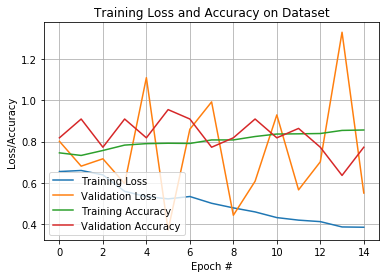

In [64]:
N = EPOCHS
H = history
plt.plot(np.arange(0, N), H.history["loss"], label="Training Loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="Validation Loss")
plt.plot(np.arange(0, N), H.history["acc"], label="Training Accuracy")
plt.plot(np.arange(0, N), H.history["val_acc"], label="Validation Accuracy")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.grid(True);
# plt.savefig("plot.png")
# print(classification_report(testLabels.argmax(axis=1), predIdxs,
#     target_names=lb.classes_))

In [68]:
from PIL import Image

In [72]:
i = Image.open(data_path + 'val2/fluffy_cat/val_2216.JPEG')

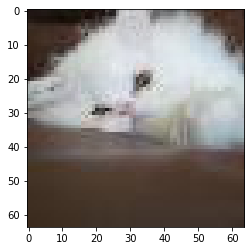

In [74]:
plt.imshow(i);